<Axes: xlabel='si_tropical', ylabel='sp_tropical'>

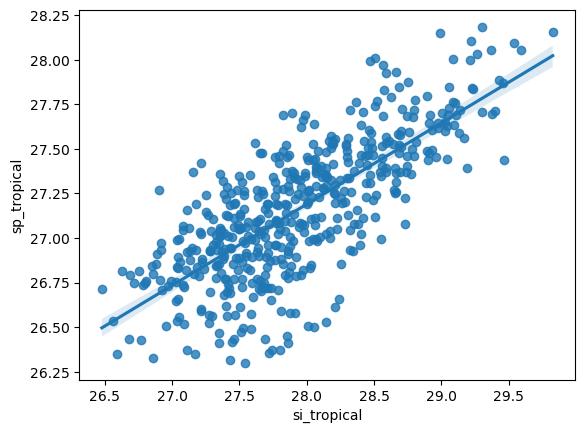

In [10]:
from utils.globals import SI_MIN, SI_MAX, SP_MIN, SP_MAX
from utils.SST_utils import get_historical_ssts, get_tropical_avg
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt

historical_ssts = get_historical_ssts()

sp_ssts = historical_ssts.sel(lon=slice(SP_MIN, SP_MAX))
si_ssts = historical_ssts.sel(lon=slice(SI_MIN, SI_MAX))

si_tropical = get_tropical_avg(si_ssts).rename({'sst': 'si_tropical'})
sp_tropical = get_tropical_avg(sp_ssts).rename({'sst': 'sp_tropical'})

tropical_avgs = xr.merge([si_tropical['si_tropical'], sp_tropical['sp_tropical']])
trop_avg_df = tropical_avgs.to_dataframe().reset_index()
sns.regplot(data=trop_avg_df, x='si_tropical', y='sp_tropical')

